<a href="https://colab.research.google.com/github/katsukiyamamoto/EU_M_Math/blob/main/Chap04_Ex_13_Cm_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#4-1-2

import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

In [3]:
#4-2-1-1

dice_data = np.array([1,2,3,4,5,6])

print('１つだけランダムに抽出', np.random.choice(dice_data, 1))

１つだけランダムに抽出 [5]


In [4]:
#4-2-2

calc_steps = 1000

dice_rolls = np.random.choice(dice_data, calc_steps)

for i in range(1,7):
  p = len(dice_rolls[dice_rolls==i]) / calc_steps
  print(i, 'が出る確率', p)

1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


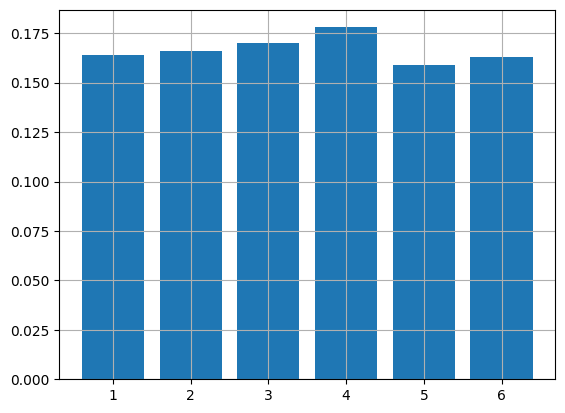

In [5]:
#4-3-2-1

calc_steps = 1000

dice_rolls = np.random.choice(dice_data, calc_steps)

prob_data = np.array([])
for i in range(1,7):
  p = len(dice_rolls[dice_rolls==i]) / calc_steps
  prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

0 が出る確率 0.0
1 が出る確率 0.164


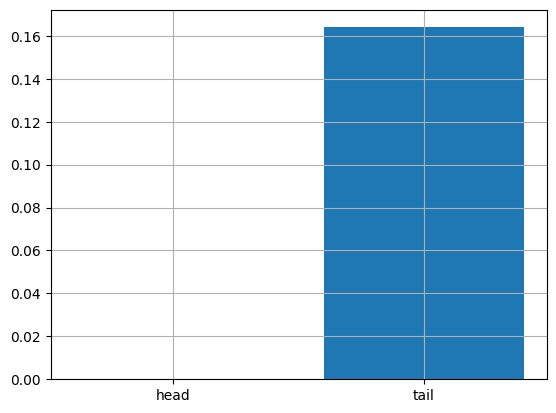

In [8]:
#4-3-2-2

prob_be_data = np.array([])
coin_data = np.array([0,0,0,0,0,1,1,1])

for i in np.unique(coin_data):
  p = len(dice_rolls[dice_rolls==i]) / calc_steps
  print(i, 'が出る確率', p)
  prob_be_data = np.append(prob_be_data, p)

plt.bar([0,1], prob_be_data, align='center')
plt.xticks([0,1],['head','tail'])
plt.grid(True)

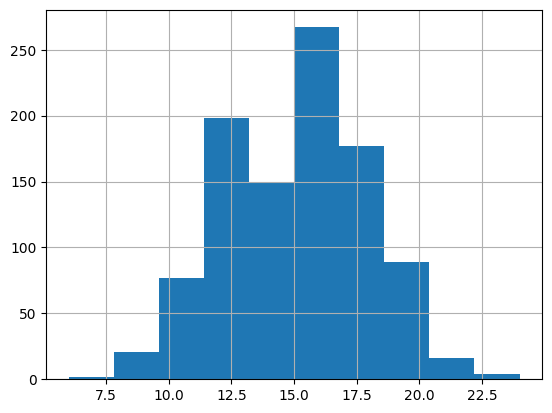

In [9]:
#4-3-2-4

np.random.seed(0)
x = np.random.binomial(30,0.5,1000)
plt.hist(x)
plt.grid(True)

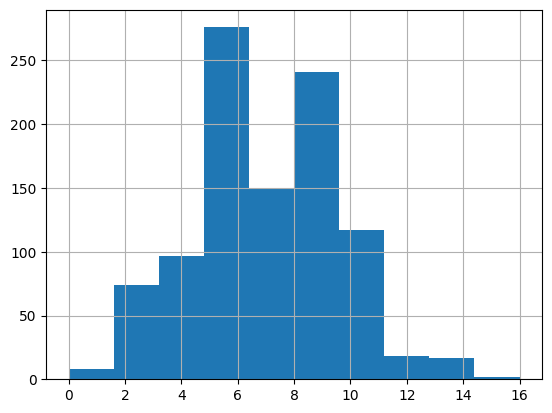

In [10]:
#4-3-2-5

x = np.random.poisson(7,1000)
plt.hist(x)
plt.grid(True)

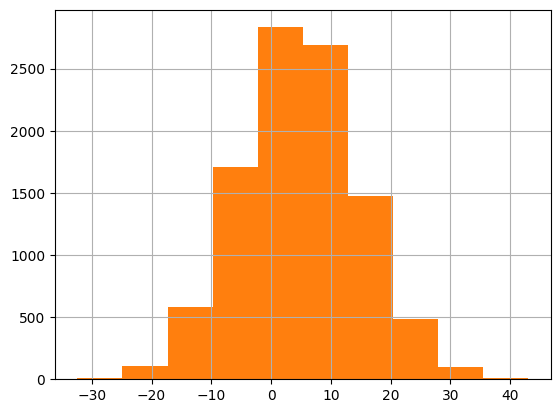

In [3]:
#4-3-2-6

x = np.random.normal(5,10,10000)
plt.hist(x)
plt.grid(True)

y = np.random.lognormal(30,0.4,1000)
plt.hist(x)
plt.grid(True)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


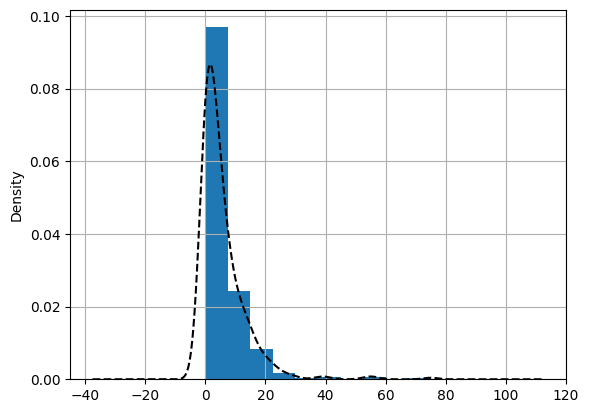

In [5]:
#4-3-3

import requests
import zipfile
from io import StringIO
import io

student_data_math = pd.read_csv(f'/content/drive/My Drive/Colab Notebooks/student-mat.csv',sep=';')

student_data_math.absences.plot(kind='kde',style='k--')

student_data_math.absences.hist(density=True)
plt.grid(True)

In [6]:
#4-4-3-1

import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

x,y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2,))

pos[:,:,0] = x
pos[:,:,0] = y

ry = multivariate_normal([50,50],[[100,0],[0,100]])

z = ry.pdf(pos)

fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x,y,z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

/usr/local/lib/python3.10/dist-packages/scipy/stats/_multivariate.py:535: RuntimeWarning: overflow encountered in square
  maha = np.sum(np.square(cov_object.whiten(dev)), axis=-1)


<Figure size 640x480 with 0 Axes>

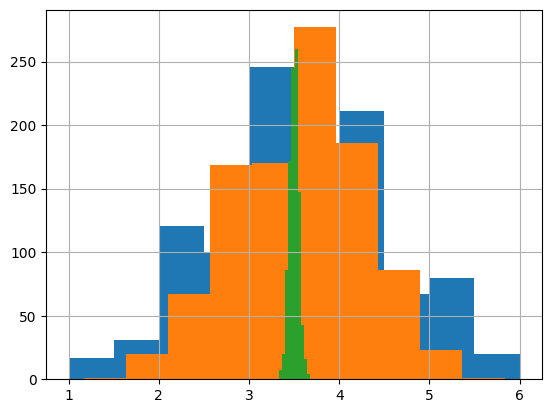

In [18]:
 #4-5-2

def function_central_theory(N):

  sample_array = np.array([1,2,3,4,5,6])
  numaber_cut = np.arange(1,N +1)*1.0

  mean_array = np.array([])

  for i in range(1000):
    cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
    mean_array = np.append(mean_array, cum_variables[N-1]/N)

  plt.hist(mean_array)
  plt.grid(True)

function_central_theory(3)
function_central_theory(6)
function_central_theory(10**3)

In [8]:
#4-7

student_data_math = pd.read_csv(f'/content/drive/My Drive/Colab Notebooks/student-mat.csv',sep=';')

student_data_por = pd.read_csv(f'/content/drive/My Drive/Colab Notebooks/student-por.csv',sep=';')

student_data_merge = pd.merge(student_data_math, student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                              , suffixes=('_math', '_por'))

print('G1数学の成績平均:', student_data_merge.G1_math.mean())
print('G1ポルトガル語の成績平均', student_data_merge.G1_por.mean())

from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print('p値 = ', p)

G1数学の成績平均: 10.861256544502618
G1ポルトガル語の成績平均 12.112565445026178
p値 =  1.6536555217101024e-16


In [7]:
#練習問題4-13

student_data_math = pd.read_csv(f'/content/drive/My Drive/Colab Notebooks/student-mat.csv',sep=';')

student_data_por = pd.read_csv(f'/content/drive/My Drive/Colab Notebooks/student-por.csv',sep=';')

student_data_merge = pd.merge(student_data_math, student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                              , suffixes=('_math', '_por'))

from scipy import stats

print('G2数学の成績平均:', student_data_merge.G2_math.mean())
print('G2ポルトガル語の成績平均', student_data_merge.G2_por.mean())

t, p = stats.ttest_rel(student_data_merge.G2_math, student_data_merge.G2_por)
print('p値 = ', p)

G2数学の成績平均: 10.712041884816754
G2ポルトガル語の成績平均 12.238219895287958
p値 =  4.0622824801348625e-19


In [10]:
#総合問題4-1

print('数学の欠席平均:', student_data_merge.absences_math.mean())
print('ポルトガル語の欠席平均', student_data_merge.absences_por.mean())

t, p = stats.ttest_rel(student_data_merge.absences_math, student_data_merge.absences_por)
print('p値 = ', p)


print('数学の勉強時間平均:', student_data_merge.studytime_math.mean())
print('ポルトガル語の勉強平均平均', student_data_merge.studytime_por.mean())

t, p = stats.ttest_rel(student_data_merge.studytime_math, student_data_merge.studytime_por)
print('p値 = ', p)

数学の欠席平均: 5.319371727748691
ポルトガル語の欠席平均 3.6727748691099475
p値 =  2.3441656888384195e-06
数学の勉強時間平均: 2.0340314136125652
ポルトガル語の勉強平均平均 2.0392670157068062
p値 =  0.5643842756976525
